In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
... resuming from 408944640 bytes (46774274 bytes left) ...
 98% 427M/435M [00:00<00:00, 127MB/s]
100% 435M/435M [00:00<00:00, 122MB/s]


In [ ]:
ls

dogs-cats-images.zip  kaggle.json


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3711.jpg  
  inflating: dog vs cat/dataset/training_

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
Categories=['cats','dogs']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/gdrive/MyDrive/kaggle/dataset/training_set'
#path which contains all the categories of images

for i in Categories:
	print(f'loading... category : {i}')
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(150,150,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
	print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [ ]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(8000, 67501)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.154919,0.174317,0.159261,0.158661,0.174558,0.170846,0.160470,0.175946,0.187711,0.162110,...,0.197737,0.138908,0.111461,0.189636,0.138860,0.107701,0.176476,0.136531,0.101754,0
1,0.112228,0.128223,0.163371,0.068746,0.084741,0.126227,0.088115,0.103878,0.150676,0.149697,...,0.756716,0.752599,0.015991,0.728919,0.718806,0.022200,0.675097,0.655304,0.015257,0
2,0.869272,0.873193,0.853585,0.873435,0.877356,0.857749,0.875278,0.879199,0.859591,0.869854,...,0.838799,0.828248,0.816542,0.845064,0.832109,0.811390,0.850880,0.828851,0.824736,0
3,0.548967,0.439163,0.294065,0.548980,0.439176,0.294078,0.564693,0.454889,0.309791,0.572549,...,0.427451,0.384314,0.274510,0.372641,0.325582,0.231464,0.353033,0.305974,0.211856,0
4,0.217073,0.203064,0.034769,0.229297,0.194294,0.065444,0.234197,0.186017,0.078425,0.241608,...,0.090419,0.594939,0.378781,0.116092,0.620151,0.400710,0.106884,0.611021,0.392386,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.064433,0.358346,0.378057,0.075010,0.362896,0.385592,0.087456,0.368354,0.392185,0.094601,...,0.300511,0.261295,0.222079,0.306770,0.267555,0.228339,0.307285,0.268069,0.228854,1
7996,0.095464,0.111151,0.115072,0.080399,0.096085,0.100007,0.076988,0.092674,0.096596,0.083194,...,0.809071,0.742422,0.709383,0.806295,0.742776,0.694070,0.801950,0.740500,0.675475,1
7997,0.600738,0.530150,0.475248,0.705673,0.635085,0.580183,0.716220,0.645632,0.590730,0.684566,...,0.594262,0.523674,0.468772,0.535430,0.464842,0.409940,0.517548,0.446960,0.392058,1
7998,0.249222,0.359025,0.159025,0.253869,0.363673,0.163673,0.257511,0.367315,0.167315,0.261556,...,0.347057,0.431424,0.229482,0.340248,0.434878,0.230402,0.335360,0.437591,0.230859,1


In [ ]:
 df = df.sample(frac=0.03, random_state=42)
 df.shape

(240, 67501)

In [ ]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,
                      test_size=.90,
											random_state=10,
											stratify=y)


In [ ]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [ ]:
# Training the model using the training data
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [ ]:
# import joblib directly
#save the model to a file
import joblib

joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 81.5126050420168% accurate


In [ ]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.81      0.86      0.84       130
         dog       0.82      0.76      0.79       108

    accuracy                           0.82       238
   macro avg       0.82      0.81      0.81       238
weighted avg       0.82      0.82      0.81       238



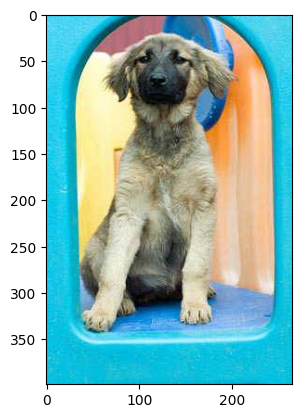

cats = 50.589447263518586%
dogs = 49.410552736481414%
The predicted image is : dogs


In [ ]:
path='dataset/test_set/dogs/dog.4030.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
	print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])